In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.python.keras.layers import Input, Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_pickle('data/typed_all_v1_2.pkl')
df

,errorCode,estimatedBandwidth,fragmentSum.bitrate,fragmentSum.downloadTime,fragmentSum.duration,fragmentSum.fragmentIndex,fragmentSum.size,frameDropped,licenseInfo.drmSystem,licenseInfo.elapsedTime,...,position,sessionId,timestamp,qualityChangedCount,content_type,bufferingTime,avgDecodingTime,bufferedDuration,currentPosition,device
1,0.0,17514086,0,0,0,0,0,0,0,888,...,2582774,9556708911304,1541470588,0,8,0,3,0,2582774,10
2,0.0,10596452,14785860,4258,39860,20,3619866,0,0,913,...,6442760,40367776409166,1541470657,1,8,0,0,59,6442760,10
3,0.0,17204800,0,0,0,0,0,0,0,939,...,2505304,64388793530698,1541470656,0,8,0,5,39,2505304,10
4,0.0,33011598,69497432,9481,113145,57,9160558,0,0,851,...,2444381,66221138236843,1541471274,2,8,1016,0,33,2444381,10
6,0.0,46066188,0,0,0,0,0,0,0,867,...,2543781,1557863053824,1541470555,0,8,0,0,31,2543781,10
7,0.0,29910232,39773650,3256,55804,28,9746084,0,0,708,...,415680,39705373231354,1541470561,1,8,0,1,51,415680,10
8,0.0,86279112,0,0,0,0,0,0,0,823,...,0,51006791020667,1541470780,0,8,0,0,64,0,10
9,0.0,19063058,26146651,7086,55786,28,6618522,0,0,1670,...,0,45090001602356,1541470785,2,8,0,0,0,0,9
10,0.0,51562580,56606460,3322,79720,40,14801081,0,0,878,...,182133,13535622710485,1541470787,1,8,0,0,60,182133,10
11,0.0,13458398,34141138,6672,45848,23,8610718,0,0,876,...,2138123,26232845244139,1541470861,1,8,922,1,4,2138123,10


In [4]:
df = df.sort_values(['timestamp'])
df = df[df['timestamp'] != 0]
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df.index = df['timestamp']
df['timestamp'].value_counts()

/home/centos/anaconda3/envs/dev/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: 'timestamp' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


2018-11-07 12:35:02    4
2018-11-07 13:21:04    3
2018-11-07 13:39:17    3
2018-11-07 13:17:28    3
2018-11-06 14:44:57    3
2018-11-07 08:45:57    3
2018-11-06 17:03:44    3
2018-11-06 08:03:57    3
2018-11-07 10:38:26    3
2018-11-07 13:54:36    3
2018-11-06 15:42:48    3
2018-11-07 12:43:10    3
2018-11-07 14:22:18    3
2018-11-07 12:12:35    3
2018-11-06 04:42:21    3
2018-11-06 13:51:22    3
2018-11-06 13:21:45    3
2018-11-06 11:08:06    3
2018-11-07 03:48:08    3
2018-11-07 14:23:25    3
2018-11-06 11:56:39    3
2018-11-07 10:10:06    3
2018-11-06 13:24:24    3
2018-11-07 14:01:03    3
2018-11-07 06:23:13    3
2018-11-07 12:32:33    3
2018-11-06 12:12:28    3
2018-11-06 12:55:51    3
2018-11-07 08:01:08    3
2018-11-07 15:22:45    3
                      ..
2018-11-07 11:44:51    1
2018-11-06 15:03:18    1
2018-11-07 06:55:59    1
2018-11-06 21:09:27    1
2018-11-06 02:49:20    1
2018-11-06 17:27:56    1
2018-11-06 05:14:38    1
2018-11-06 22:20:48    1
2018-11-07 19:06:37    1


In [5]:
del df['timestamp']

In [6]:
df.columns

Index(['errorCode', 'estimatedBandwidth', 'fragmentSum.bitrate',
       'fragmentSum.downloadTime', 'fragmentSum.duration',
       'fragmentSum.fragmentIndex', 'fragmentSum.size', 'frameDropped',
       'licenseInfo.drmSystem', 'licenseInfo.elapsedTime', 'maxDecodingTime',
       'networkErrors', 'networkInfo.carrier.mnc', 'networkInfo.type',
       'position', 'sessionId', 'qualityChangedCount', 'content_type',
       'bufferingTime', 'avgDecodingTime', 'bufferedDuration',
       'currentPosition', 'device'],
      dtype='object')

In [7]:
features = ['estimatedBandwidth', 'fragmentSum.bitrate',
       'fragmentSum.downloadTime', 'fragmentSum.duration',
       'fragmentSum.fragmentIndex', 'fragmentSum.size', 'frameDropped',
       'licenseInfo.drmSystem', 'licenseInfo.elapsedTime', 'maxDecodingTime',
       'networkErrors', 'networkInfo.carrier.mnc', 'networkInfo.type',
       'position', 'sessionId', 'qualityChangedCount',
       'content_type', 'bufferingTime', 'avgDecodingTime', 'bufferedDuration',
       'currentPosition', 'device']

In [20]:
df.isnull().values.any()

False

In [9]:
x_data = df[features].as_matrix()
y_data = df['errorCode'].as_matrix()
x_data, y_data

/home/centos/anaconda3/envs/dev/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/home/centos/anaconda3/envs/dev/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


(array([[66791384, 0, 0, ..., 0, 2710008, 10],
        [30158938, 0, 0, ..., 48, 4587978, 10],
        [80715832, 106455214, 8654, ..., 49, 2937, 10],
        ..., 
        [5760984, 20400035, 9392, ..., 0, 1015048, 9],
        [65991252, 0, 0, ..., 61, 7093921, 10],
        [23087448, 1470844, 494, ..., 29, 2520760, 10]], dtype=object),
 array([ 0.,  0.,  0., ...,  0.,  0.,  0.]))

In [10]:
x_data.shape, y_data.shape

((18655, 22), (18655,))

In [11]:
y_data = y_data.reshape(len(y_data), -1)
y_data.shape

(18655, 1)

In [12]:
num_data = len(x_data)
num_data

18655

In [13]:
train_split = 0.7

In [14]:
train_num = int(train_split*num_data)
train_num

13058

In [15]:
test_num = num_data - train_num
test_num

5597

In [16]:
x_train = x_data[:train_num]
x_test = x_data[train_num:]

y_train = y_data[:train_num]
y_test = y_data[train_num:]

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((13058, 22), (5597, 22), (13058, 1), (5597, 1))

In [17]:
num_x_signals = x_data.shape[1]
num_y_signals = y_data.shape[1]
num_x_signals, num_y_signals

(22, 1)

In [18]:
x_scaler = MinMaxScaler()
x_train_scaled = x_scaler.fit_transform(x_train)
x_test_scaled = x_scaler.fit_transform(x_test)

y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.fit_transform(y_test)

/home/centos/anaconda3/envs/dev/lib/python3.5/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/centos/anaconda3/envs/dev/lib/python3.5/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [19]:
print(x_train_scaled.shape)

(13058, 22)


--------------------------------

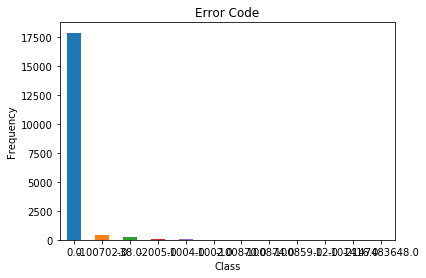

In [31]:
count_classes = pd.value_counts(df['errorCode'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title('Error Code')
plt.xlabel("Class")
plt.ylabel("Frequency")

In [32]:
normal = df[df.errorCode == 0]
error = df[df.errorCode != 0]

error.shape, normal.shape

((801, 23), (17854, 23))

In [33]:
error.describe()

,estimatedBandwidth,fragmentSum.bitrate,fragmentSum.downloadTime,fragmentSum.duration,fragmentSum.fragmentIndex,fragmentSum.size,frameDropped,licenseInfo.elapsedTime,maxDecodingTime,position,sessionId,qualityChangedCount,bufferingTime,avgDecodingTime,bufferedDuration,currentPosition
count,8.010000e+02,8.010000e+02,801.000000,801.000000,801.000000,8.010000e+02,801.000000,801.000000,801.000000,8.010000e+02,8.010000e+02,801.000000,801.000000,801.000000,801.000000,8.010000e+02
mean,5.934125e+07,5.597593e+06,4175.818976,18481.827715,27.696629,1.201738e+06,0.024969,1032.521848,1.017478,4.519651e+05,5.017965e+13,1.320849,42.541823,0.209738,23.406991,4.538410e+05
std,2.073958e+08,1.129423e+07,15832.717360,22199.278617,25.342634,2.467082e+06,0.178538,551.509828,6.540619,1.270555e+06,2.909928e+13,0.594287,835.978504,1.106099,251.255446,1.270996e+06
min,-1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,575.000000,0.000000,0.000000e+00,5.781208e+10,0.000000,0.000000,0.000000,-1.000000,-1.000000e+00
25%,-1.000000e+00,0.000000e+00,0.000000,0.000000,11.000000,0.000000e+00,0.000000,806.000000,0.000000,0.000000e+00,2.374776e+13,1.000000,0.000000,0.000000,-1.000000,-1.000000e+00
50%,-1.000000e+00,2.435049e+06,1521.000000,15944.000000,15.000000,4.772790e+05,0.000000,916.000000,0.000000,0.000000e+00,4.965636e+13,1.000000,0.000000,0.000000,-1.000000,-1.000000e+00
75%,1.733500e+07,5.869175e+06,2403.000000,27884.000000,61.000000,1.139961e+06,0.000000,1084.000000,0.000000,0.000000e+00,7.586206e+13,2.000000,0.000000,0.000000,0.000000,0.000000e+00
max,2.067912e+09,1.177126e+08,172134.000000,183338.000000,124.000000,2.441378e+07,3.000000,9137.000000,144.000000,8.921756e+06,9.978408e+13,2.000000,23450.000000,12.000000,5403.000000,8.921756e+06


In [34]:
normal.describe()

,estimatedBandwidth,fragmentSum.bitrate,fragmentSum.downloadTime,fragmentSum.duration,fragmentSum.fragmentIndex,fragmentSum.size,frameDropped,licenseInfo.elapsedTime,maxDecodingTime,position,sessionId,qualityChangedCount,bufferingTime,avgDecodingTime,bufferedDuration,currentPosition
count,1.785400e+04,1.785400e+04,17854.000000,17854.000000,17854.000000,1.785400e+04,17854.000000,17854.000000,17854.000000,1.785400e+04,1.785400e+04,17854.000000,17854.000000,17854.000000,17854.000000,1.785400e+04
mean,9.717006e+07,1.205098e+07,2211.220511,24159.795116,16.300269,2.608174e+06,0.034222,1024.282850,8.678055,1.490255e+06,4.999868e+13,0.700627,173.543352,1.889213,315.332811,1.492726e+06
std,2.312167e+08,2.417432e+07,3713.971067,42858.133033,27.786131,5.557138e+06,0.277631,571.262664,17.724302,1.980292e+06,2.905179e+13,0.851845,769.731302,3.545551,915.447282,1.981051e+06
min,-1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,473.000000,0.000000,0.000000e+00,1.303572e+10,0.000000,0.000000,0.000000,-1.000000,-1.000000e+00
25%,1.394812e+07,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,811.000000,0.000000,0.000000e+00,2.492079e+13,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,3.329341e+07,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,931.000000,6.000000,3.754445e+05,4.977535e+13,0.000000,0.000000,0.000000,32.000000,3.817340e+05
75%,6.667018e+07,1.199582e+07,3729.750000,33872.000000,23.000000,2.401804e+06,0.000000,1118.000000,13.000000,2.560161e+06,7.538683e+13,1.000000,0.000000,2.000000,54.000000,2.560554e+06
max,4.413400e+09,3.005716e+08,87188.000000,430452.000000,343.000000,7.767183e+07,11.000000,38270.000000,1095.000000,1.064796e+07,9.999582e+13,6.000000,43709.000000,42.000000,9943.000000,1.064796e+07


In [35]:
import pandas as pd

In [ ]:
ddf = pd.read_pickle('data/')